**Long Short Term Memory(LSTM)**

In [ ]:
#import the necesssary libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, Dropout, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [ ]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label = 'Real IBM Stock Price')
    plt.plot(predicted, color='blue',label = 'Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
dataset = pd.read_csv('/content/gdrive/My Drive/IBM.csv')#, index_col='Date', parse_dates=['Date']) 
dataset.head()

# USE THE FOLLOWING COMMAND TO GET THE 'DATA' INSTEAD OF 'NUMBERS' ON X-AXIS ON PLOT.

#import pandas as pd
#dataset = pd.read_csv('/content/gdrive/My Drive/IBM.csv'), index_col='Date', parse_dates=['Date']) 
#dataset.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
1,2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2,2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
3,2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
4,2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [ ]:
#Getting "High" attribute
df2 = dataset['High']
df2.head

<bound method NDFrame.head of 0        82.55
1        82.50
2        82.90
3        85.03
4        84.25
         ...  
3015    153.00
3016    153.86
3017    153.18
3018    154.12
3019    154.72
Name: High, Length: 3020, dtype: float64>

In [ ]:
#In the above, no index is present. The data is presented as Date, values
#We need the index number for the mc learning model 
#Therefore, use 'reset_index' method to get the index.

#get attribute 'Close'
df1 = dataset.reset_index()['High']
df1

0        82.55
1        82.50
2        82.90
3        85.03
4        84.25
         ...  
3015    153.00
3016    153.86
3017    153.18
3018    154.12
3019    154.72
Name: High, Length: 3020, dtype: float64

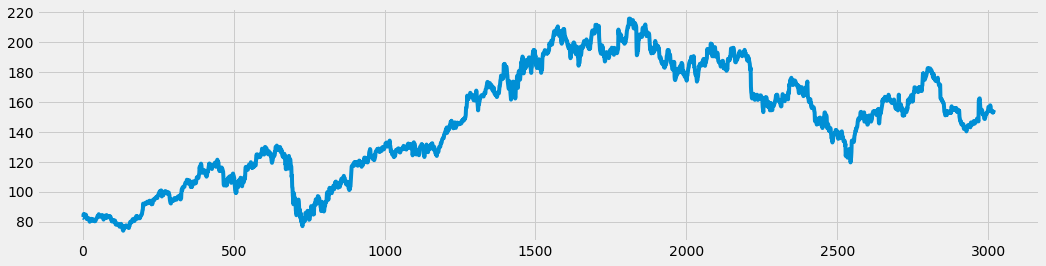

In [ ]:
#PLot data
#..........Method 2
dataset['High'].plot(figsize=(16,4) )
plt.show()

In [ ]:
# Reshape the dataset 
df1 = np.array(df1).reshape(-1 , 1)
df1[:5]

array([[82.55],
       [82.5 ],
       [82.9 ],
       [85.03],
       [84.25]])

In [ ]:
# split the data into train and test data
trainSize = int(len(df1)*0.67)
testSize = len(df1) - trainSize
trainData , testData = df1[0:trainSize , : ] , df1[trainSize : len(df1),:1]

#df1[a :b , c: d] format is present because dataset has rows and column.

In [ ]:
# Scaling the data
# Line 1 : Def Scaling to range (0,1)
# Line 2 : Scaling
scaler = MinMaxScaler(feature_range=(0,1))
trainData = scaler.fit_transform(trainData)

In [ ]:
trainData.shape

(2023, 1)

In [ ]:
# Now create the xTrain and yTrain from the trainData(i.e training data)

xTrain, yTrain = [] , []

for i in range(60, 2023):
    xTrain.append(trainData[i-60 : i , 0])
    yTrain.append(trainData[i,0])

xTrain, yTrain = np.array(xTrain) , np.array(yTrain)

In [ ]:
xTrain.shape

(1963, 60)

In [ ]:
#Reshaping xTrain for efficient modelling
xTrain = np.reshape(xTrain , (xTrain.shape[0] , xTrain.shape[1] , 1))

In [ ]:
xTrain.shape

(1963, 60, 1)

### **LSTM**

In [ ]:
# LSTM Architecture
model = Sequential()

#first layer with Drouput Regularsation
model.add(LSTM(units=50 , return_sequences=True , input_shape = (xTrain.shape[1], 1)))
model.add(Dropout(0.2))

#Second LSTM layer
model.add(LSTM(units=50 , return_sequences=True))
model.add(Dropout(0.2))

#Third LSTM layer
model.add(LSTM(units=50 , return_sequences=True))
model.add(Dropout(0.2))

#Fourth LSTM layer
model.add(LSTM(units=50))
model.add(Dropout(0.2))

#The output layer
model.add(Dense(units=1))

In [ ]:
#Compiling the model
model.compile(optimizer = 'rmsprop' , loss='mean_squared_error')


In [ ]:
xTrain.shape

(1963, 60, 1)

In [ ]:
#Fitting to the traing set
model.fit(xTrain , yTrain , epochs = 50 , batch_size = 32)

Epoch 1/50
62/62 [==============================] - 10s 72ms/step - loss: 0.0621
Epoch 2/50
62/62 [==============================] - 5s 78ms/step - loss: 0.0131
Epoch 3/50
62/62 [==============================] - 5s 78ms/step - loss: 0.0105
Epoch 4/50
62/62 [==============================] - 5s 78ms/step - loss: 0.0086
Epoch 5/50
62/62 [==============================] - 5s 78ms/step - loss: 0.0066
Epoch 6/50
62/62 [==============================] - 5s 77ms/step - loss: 0.0056
Epoch 7/50
62/62 [==============================] - 5s 78ms/step - loss: 0.0060
Epoch 8/50
62/62 [==============================] - 5s 77ms/step - loss: 0.0051
Epoch 9/50
62/62 [==============================] - 5s 78ms/step - loss: 0.0050
Epoch 10/50
62/62 [==============================] - 5s 79ms/step - loss: 0.0050
Epoch 11/50
62/62 [==============================] - 5s 78ms/step - loss: 0.0045
Epoch 12/50
62/62 [==============================] - 5s 77ms/step - loss: 0.0041
Epoch 13/50
62/62 [=================

In [ ]:
#Get test set ready as similar to traing set
#create a whole dataset
dataset_total = (dataset["High"])
dataset_total.shape

(3020,)

In [ ]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 
# 'High' attribute data for processing
dataset_total = (dataset["High"])
inputs = dataset_total[len(dataset_total)-len(testData) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.fit_transform(inputs)
inputs[:5]


array([[0.69252043],
       [0.70282841],
       [0.70810811],
       [0.73199246],
       [0.74720302]])

In [ ]:
inputs.shape

(1057, 1)

In [ ]:
# Create xTest and yTest from testData(i.e. testing data)
# 60 timestep and 1 output
xTest = []

for i in range(60, 1057):
    xTest.append(inputs[i-60 : i , 0])
  

xTest = np.array(xTest) 
xTest = np.reshape(xTest, (xTest.shape[0],xTest.shape[1],1))
predicted_stock_price = model.predict(xTest)
predicted_stock_price2 = scaler.inverse_transform(predicted_stock_price)
#testData2 = scaler.inverse_transform(testData)

In [ ]:
inputs.shape

(1057, 1)

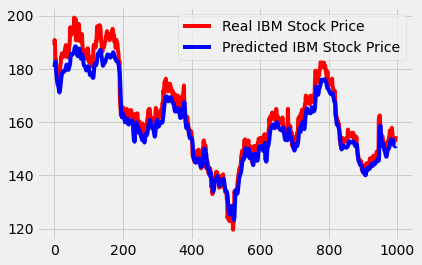

In [ ]:
plt.plot(testData, color='red',label='Real IBM Stock Price')
plt.plot(predicted_stock_price2, color='blue',label='Predicted IBM Stock Price')
plt.xlabel = 'Time'
plt.ylabel = 'IBM Stock price'
plt.legend()
plt.show()

In [ ]:
rmse = math.sqrt(mean_squared_error(testData, predicted_stock_price2))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 4.5562793360766936.
